### Author: Tejaswini Patil
### Reg No: 20MAI0044
### Deep Learning CSE6037-Lab3
***Activity 2 - Write a code to Implement new CNN model***

Note: I have prepared a dataset for implementing on a personal project Sudoku Solver using Deep Learning and OpenCV. Thus, presenting part of work here where I have a part of training using CNN. This dataset has 9 classes labeled from 1-9 in a Sudoku. I have cropped the images on my own from a Sudoku that appeared in newspapers. For each digit I have prepared a dataset of around 130 images. Kindly visit the github repository for data

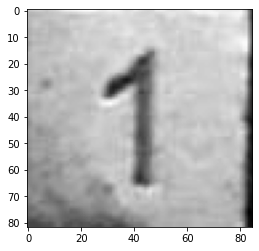

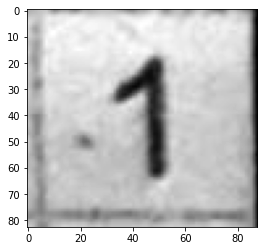

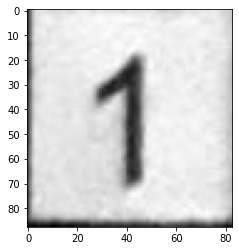

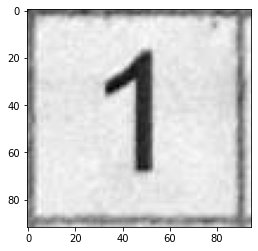

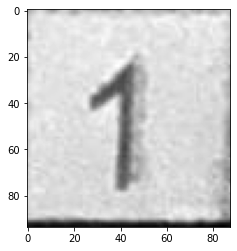

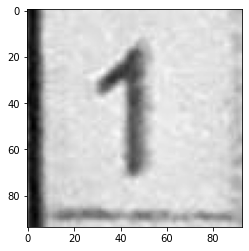

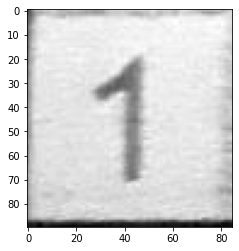

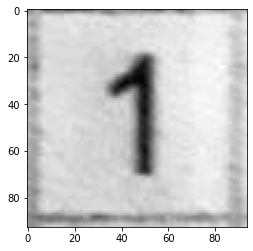

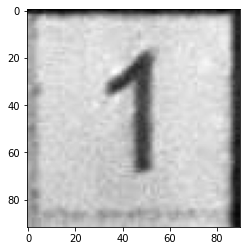

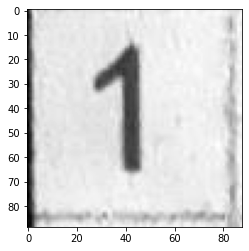

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

#Setting path to the data set
DATADIR = "Data/Digits"

#List of 'categories'
CATEGORIES = ["1","2","3","4","5","6","7","8","9"]

#Looping through the directories and displaying first 10 images of each directory of a digit
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) #path to 1-9 digits data set directory
    ct=0
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap = "gray")
        plt.show()
        ct+=1
        if(ct==10):
            break
    break
    

In [2]:
print(img_array)

[[ 66 128 207 ... 208 208 221]
 [ 58 115 202 ... 214 217 230]
 [ 46  96 189 ... 214 223 234]
 ...
 [ 43  44  89 ... 186 208 205]
 [ 40  41  93 ... 182 198 217]
 [ 35  47  91 ... 181 190 220]]


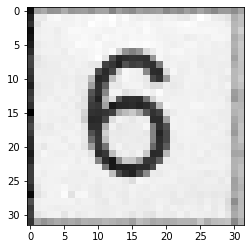

In [13]:
IMG_SIZE = 32 #Deciding on a shape
img_array = cv2.imread("Data/Digits/6/6_001.jpg",cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [14]:
#Build a training data
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) #path to 1-9 digits data set directory
        class_num = CATEGORIES.index(category)
        for image in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
            try:
                IMG_SIZE = 32 #Deciding on a shape
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [15]:
print(len(training_data)) #130 images per-class * 9 classes

1170


In [16]:
training_data[1150] #1151th image is of digit 9 => class index is 8 (0-based indexing of categories)

[array([[220, 239, 240, ..., 248, 247, 244],
        [221, 245, 241, ..., 247, 248, 245],
        [225, 239, 238, ..., 244, 248, 242],
        ...,
        [232, 242, 239, ..., 240, 238, 231],
        [230, 242, 241, ..., 241, 241, 231],
        [223, 230, 228, ..., 232, 230, 211]], dtype=uint8),
 8]

In [17]:
training_data[1150][1]

8

In [18]:
# Let's shuffle the data
import random

#training data is a list which has image stored in the form of an array as its one attribute and target as one column
random.shuffle(training_data) 

In [19]:
#How the data looks when it is shuffled
for sample in training_data[:10]:
    print(sample[1])    #printing the target variable

0
3
0
5
6
8
7
1
2
2


In [20]:
X = []
Y = []

for features,label in training_data:
    #separating out X and Y
    X.append(features)  
    Y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)   #reshaping the images

In [21]:
X.shape

(1170, 32, 32, 1)

In [22]:
#Let's dump our data using pickle
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

In [23]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

Y[1000],X[1000]

(7,
 array([[[193],
         [195],
         [208],
         ...,
         [216],
         [147],
         [ 65]],
 
        [[188],
         [206],
         [213],
         ...,
         [229],
         [141],
         [ 68]],
 
        [[198],
         [216],
         [247],
         ...,
         [244],
         [158],
         [ 63]],
 
        ...,
 
        [[197],
         [197],
         [242],
         ...,
         [241],
         [146],
         [ 64]],
 
        [[196],
         [202],
         [237],
         ...,
         [242],
         [134],
         [ 61]],
 
        [[ 47],
         [ 51],
         [ 46],
         ...,
         [ 63],
         [ 55],
         [ 60]]], dtype=uint8))

In [24]:
#importing the necessary libraries for training
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split

In [25]:
#Using the dumps of data we've created earlier
X = pickle.load(open("X.pickle","rb"))
Y = pickle.load(open("Y.pickle","rb"))

Y = np.array(Y) #Converting the Y list of values to numpy array
X = X/255.0 #Normalize our data

### Let's get moving to the ML part our task

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

#Deciding upon the architecture of our model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5,5), activation='relu', input_shape= X.shape[1:]),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(120, activation='relu'),
  tf.keras.layers.Dense(84, activation='relu'),
  tf.keras.layers.Dense(9, activation='softmax') #for binary classifier sigmoid can be used
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Getting to know more about the layers of our architecture
model.summary()

#Training the data
model.fit(X_train, Y_train, epochs=5)

#Evaluating the model:
test_loss,test_acc = model.evaluate(X_test, Y_test)

print("Accuracy: ",test_acc,"Loss: ",test_loss)
predictions = model.predict([X_test]) # Make prediction

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

#### Knowing where the fault lies if possible with the help of test data

sample: 0 predicted: 4 actual: 4


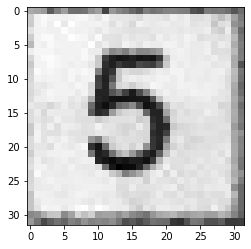

sample: 1 predicted: 5 actual: 5


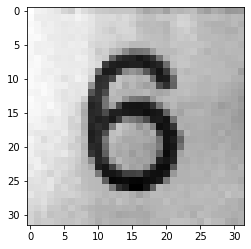

sample: 2 predicted: 6 actual: 6


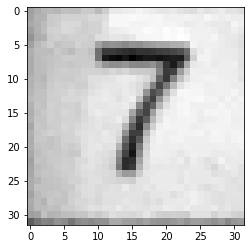

sample: 3 predicted: 1 actual: 1


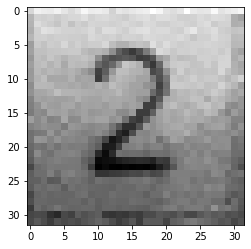

sample: 4 predicted: 6 actual: 6


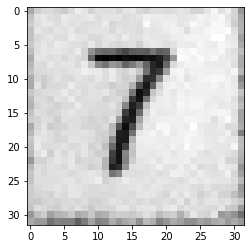

sample: 5 predicted: 7 actual: 5


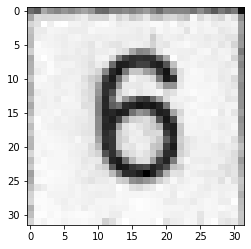

sample: 6 predicted: 3 actual: 3


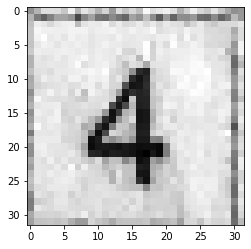

sample: 7 predicted: 3 actual: 3


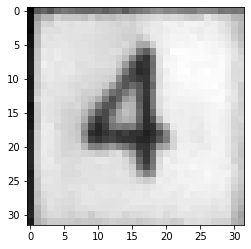

sample: 8 predicted: 8 actual: 8


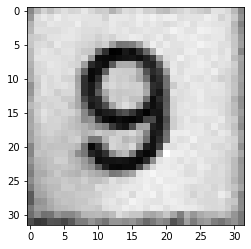

sample: 9 predicted: 2 actual: 2


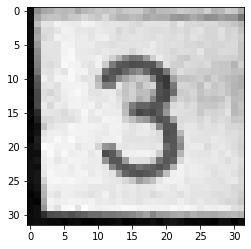

sample: 10 predicted: 2 actual: 2


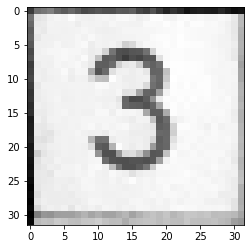

sample: 11 predicted: 6 actual: 6


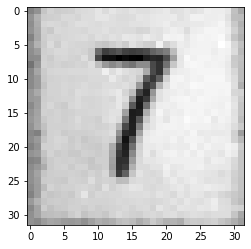

sample: 12 predicted: 4 actual: 4


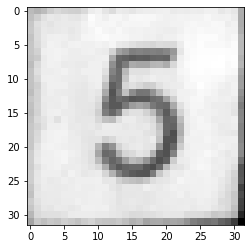

sample: 13 predicted: 4 actual: 4


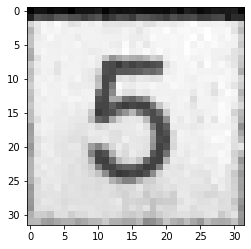

sample: 14 predicted: 4 actual: 4


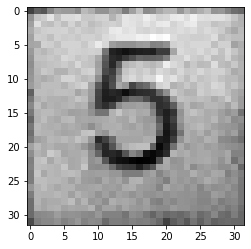

sample: 15 predicted: 8 actual: 8


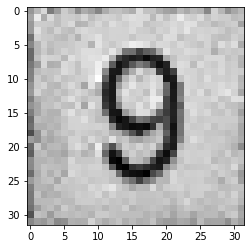

sample: 16 predicted: 5 actual: 5


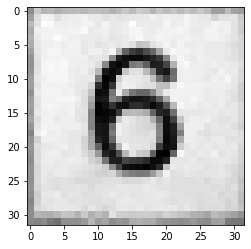

sample: 17 predicted: 2 actual: 2


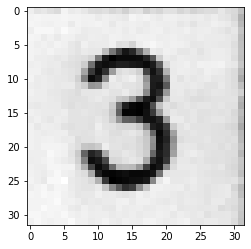

sample: 18 predicted: 8 actual: 8


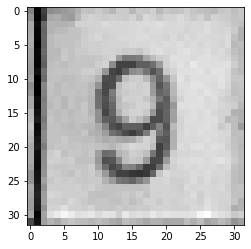

sample: 19 predicted: 4 actual: 5


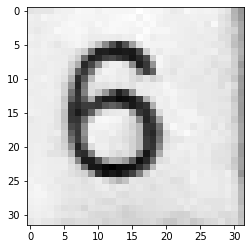

sample: 20 predicted: 4 actual: 4


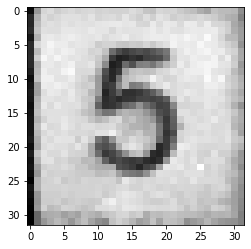

sample: 21 predicted: 3 actual: 3


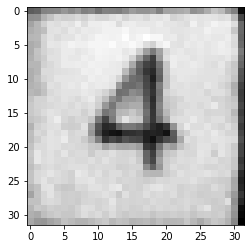

sample: 22 predicted: 0 actual: 0


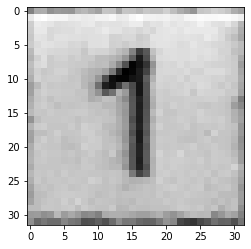

sample: 23 predicted: 8 actual: 8


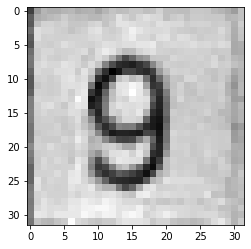

sample: 24 predicted: 3 actual: 3


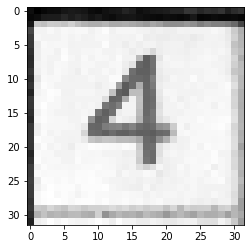

sample: 25 predicted: 2 actual: 2


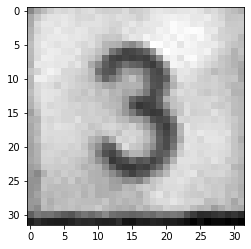

sample: 26 predicted: 0 actual: 0


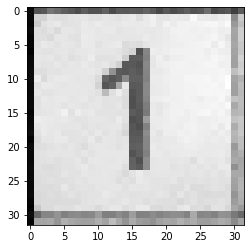

sample: 27 predicted: 5 actual: 5


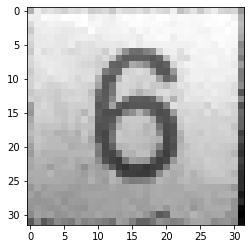

sample: 28 predicted: 4 actual: 4


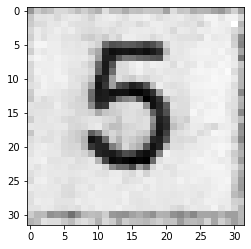

sample: 29 predicted: 3 actual: 3


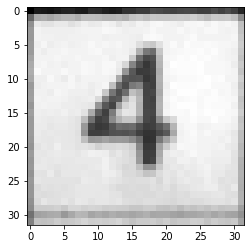

sample: 30 predicted: 0 actual: 0


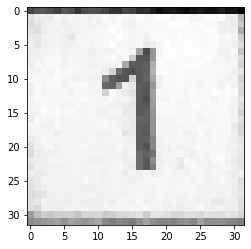

sample: 31 predicted: 4 actual: 4


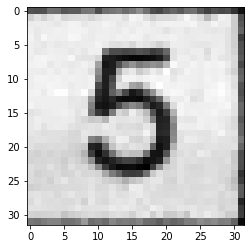

sample: 32 predicted: 2 actual: 2


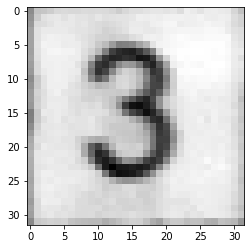

sample: 33 predicted: 8 actual: 8


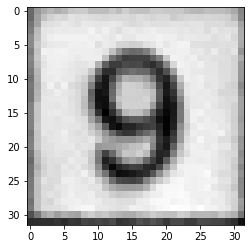

sample: 34 predicted: 7 actual: 7


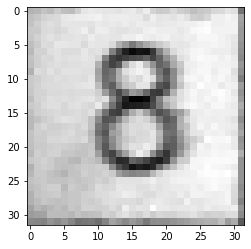

sample: 35 predicted: 7 actual: 7


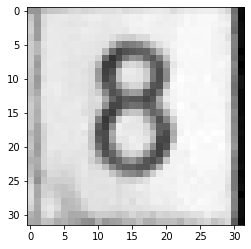

sample: 36 predicted: 1 actual: 1


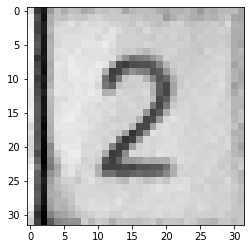

sample: 37 predicted: 1 actual: 1


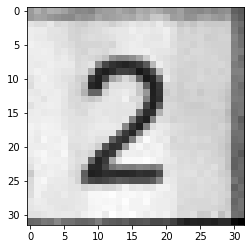

sample: 38 predicted: 3 actual: 3


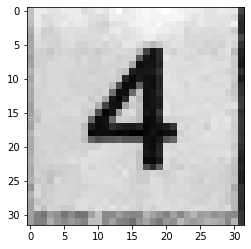

sample: 39 predicted: 5 actual: 5


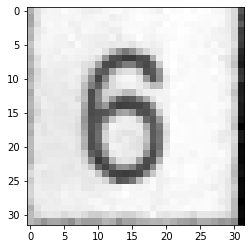

sample: 40 predicted: 8 actual: 8


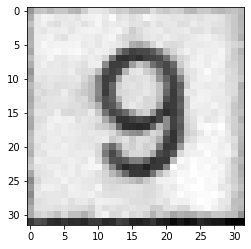

sample: 41 predicted: 6 actual: 6


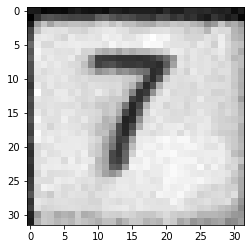

sample: 42 predicted: 5 actual: 5


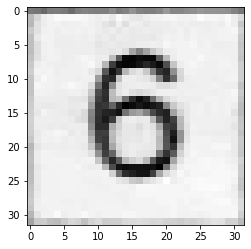

sample: 43 predicted: 7 actual: 7


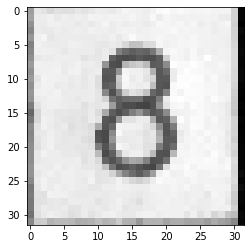

sample: 44 predicted: 8 actual: 8


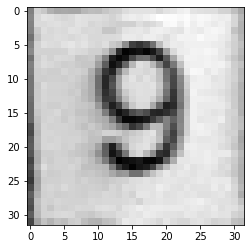

sample: 45 predicted: 2 actual: 2


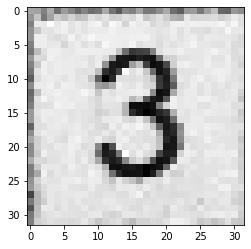

sample: 46 predicted: 0 actual: 0


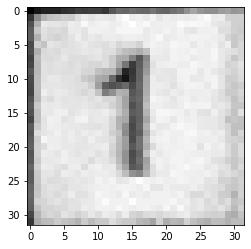

sample: 47 predicted: 5 actual: 5


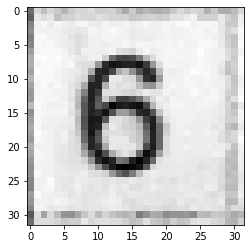

sample: 48 predicted: 1 actual: 1


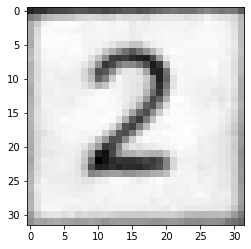

sample: 49 predicted: 4 actual: 4


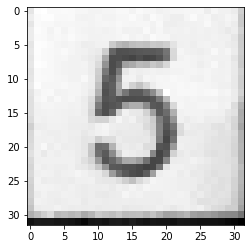

sample: 50 predicted: 0 actual: 0


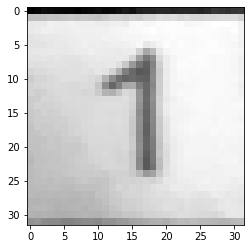

sample: 51 predicted: 7 actual: 5


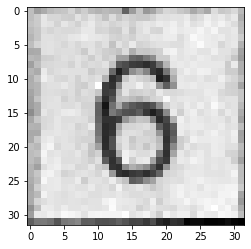

sample: 52 predicted: 0 actual: 0


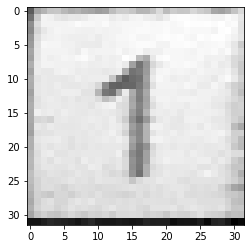

sample: 53 predicted: 2 actual: 2


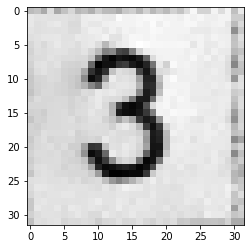

sample: 54 predicted: 6 actual: 6


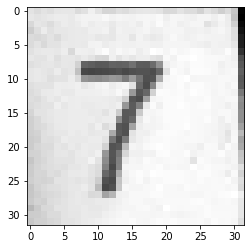

sample: 55 predicted: 7 actual: 7


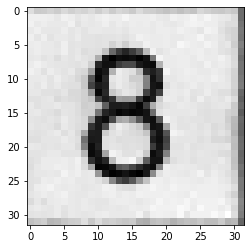

sample: 56 predicted: 2 actual: 2


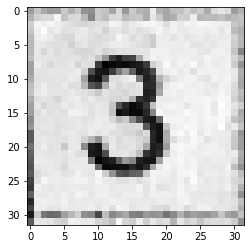

sample: 57 predicted: 5 actual: 5


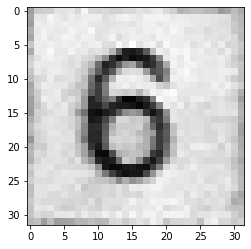

sample: 58 predicted: 2 actual: 2


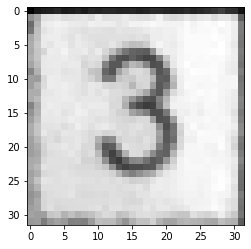

sample: 59 predicted: 8 actual: 8


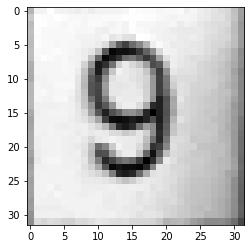

sample: 60 predicted: 5 actual: 5


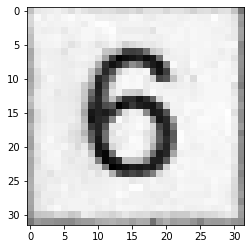

sample: 61 predicted: 6 actual: 6


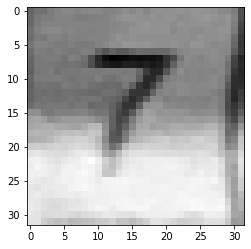

sample: 62 predicted: 7 actual: 7


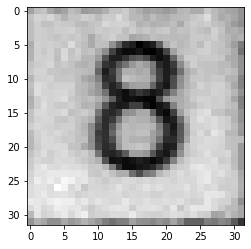

sample: 63 predicted: 7 actual: 7


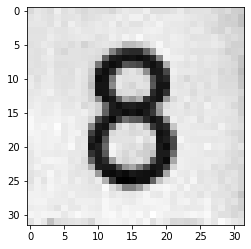

sample: 64 predicted: 6 actual: 6


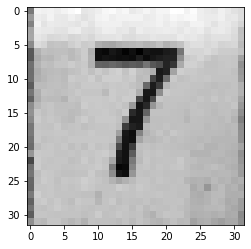

sample: 65 predicted: 8 actual: 8


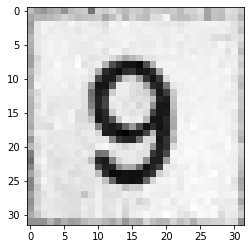

sample: 66 predicted: 2 actual: 2


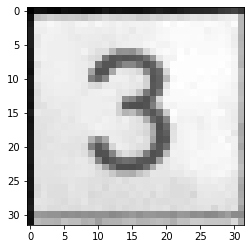

sample: 67 predicted: 6 actual: 6


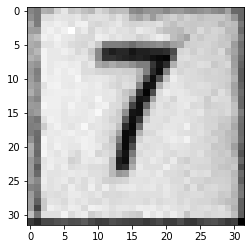

sample: 68 predicted: 2 actual: 2


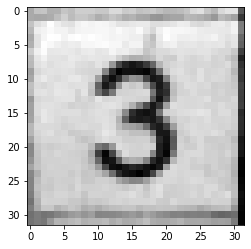

sample: 69 predicted: 2 actual: 2


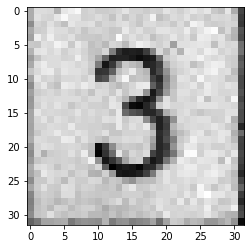

sample: 70 predicted: 0 actual: 0


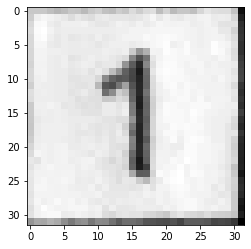

sample: 71 predicted: 3 actual: 3


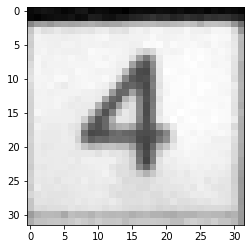

sample: 72 predicted: 2 actual: 2


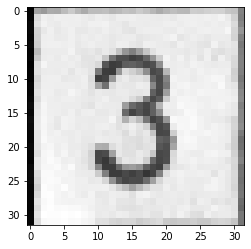

sample: 73 predicted: 6 actual: 6


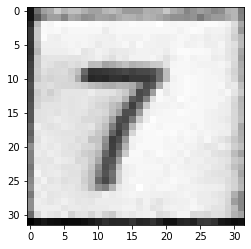

sample: 74 predicted: 3 actual: 3


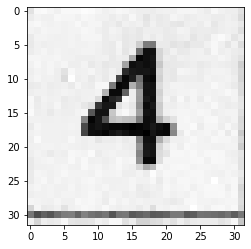

sample: 75 predicted: 8 actual: 8


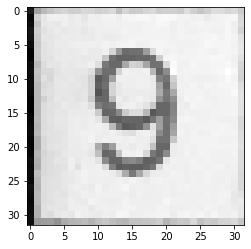

sample: 76 predicted: 0 actual: 0


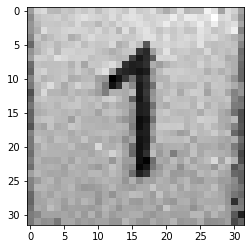

sample: 77 predicted: 7 actual: 7


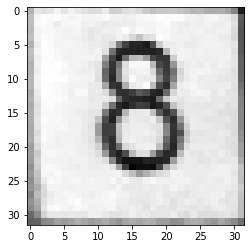

sample: 78 predicted: 0 actual: 0


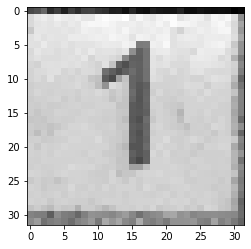

sample: 79 predicted: 4 actual: 4


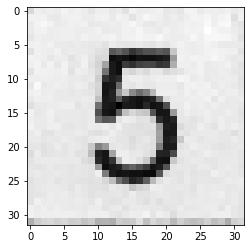

sample: 80 predicted: 6 actual: 6


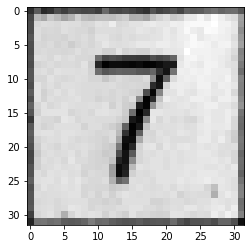

sample: 81 predicted: 7 actual: 7


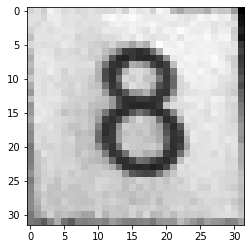

sample: 82 predicted: 5 actual: 5


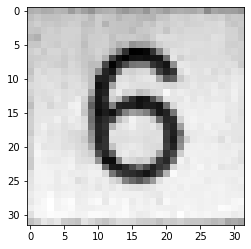

sample: 83 predicted: 4 actual: 4


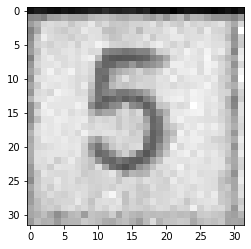

sample: 84 predicted: 2 actual: 2


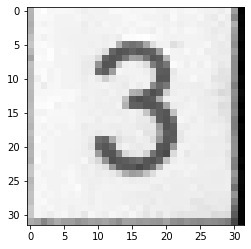

sample: 85 predicted: 5 actual: 5


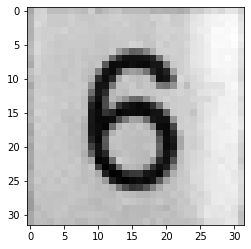

sample: 86 predicted: 3 actual: 3


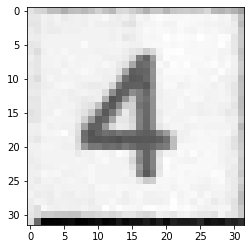

sample: 87 predicted: 7 actual: 7


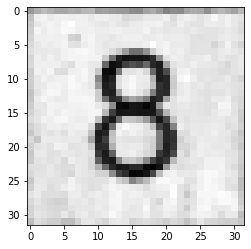

sample: 88 predicted: 0 actual: 0


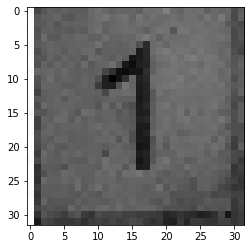

sample: 89 predicted: 1 actual: 1


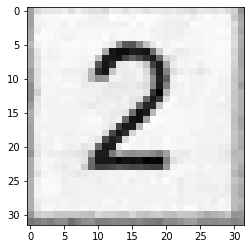

sample: 90 predicted: 0 actual: 0


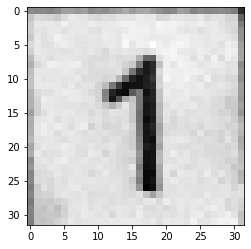

sample: 91 predicted: 3 actual: 3


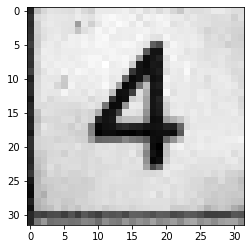

sample: 92 predicted: 0 actual: 0


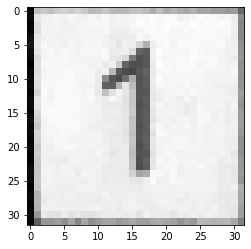

sample: 93 predicted: 0 actual: 0


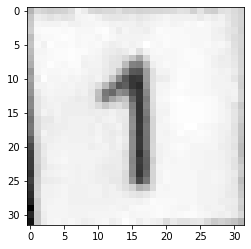

sample: 94 predicted: 8 actual: 8


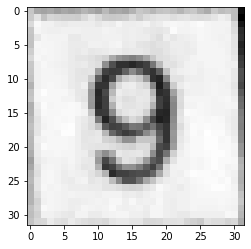

sample: 95 predicted: 4 actual: 4


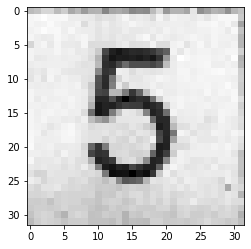

sample: 96 predicted: 8 actual: 8


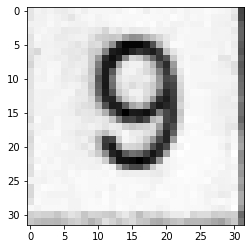

sample: 97 predicted: 6 actual: 6


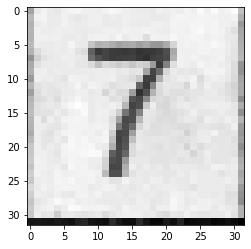

sample: 98 predicted: 8 actual: 8


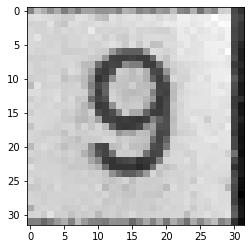

sample: 99 predicted: 4 actual: 4


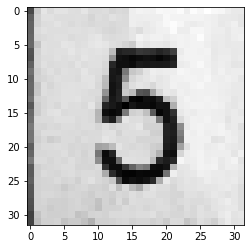

sample: 100 predicted: 5 actual: 5


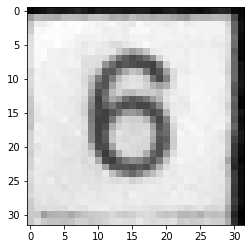

sample: 101 predicted: 1 actual: 1


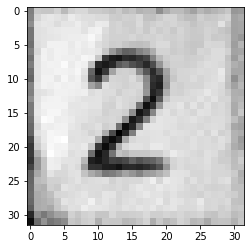

sample: 102 predicted: 7 actual: 7


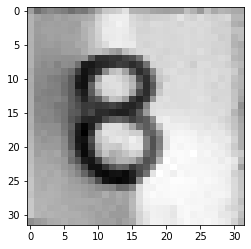

sample: 103 predicted: 3 actual: 3


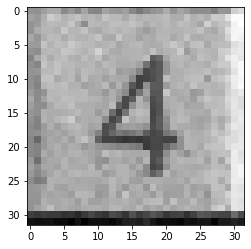

sample: 104 predicted: 5 actual: 5


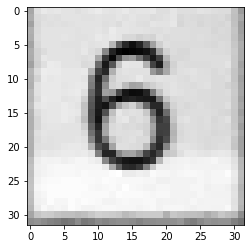

sample: 105 predicted: 7 actual: 7


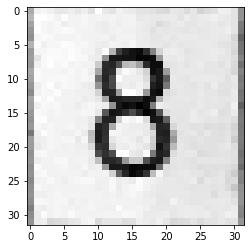

sample: 106 predicted: 7 actual: 7


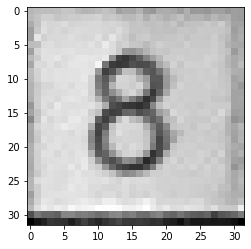

sample: 107 predicted: 2 actual: 2


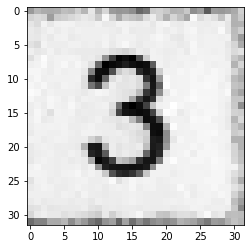

sample: 108 predicted: 0 actual: 1


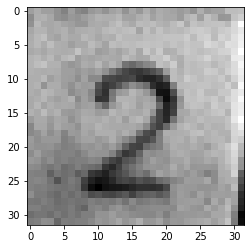

sample: 109 predicted: 5 actual: 5


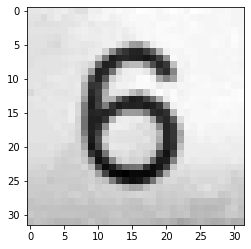

sample: 110 predicted: 8 actual: 8


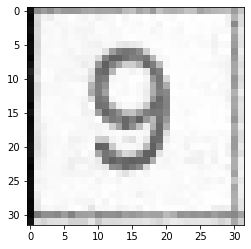

sample: 111 predicted: 8 actual: 8


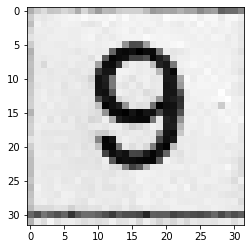

sample: 112 predicted: 5 actual: 5


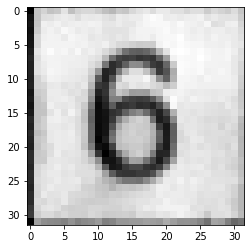

sample: 113 predicted: 0 actual: 0


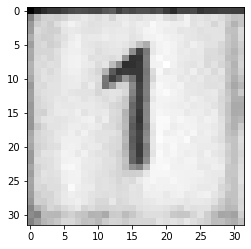

sample: 114 predicted: 4 actual: 4


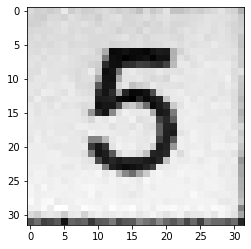

sample: 115 predicted: 8 actual: 8


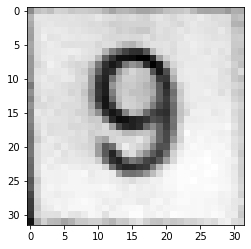

sample: 116 predicted: 3 actual: 3


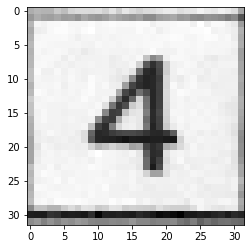

sample: 117 predicted: 3 actual: 3


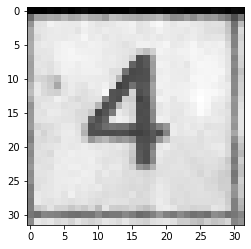

sample: 118 predicted: 0 actual: 0


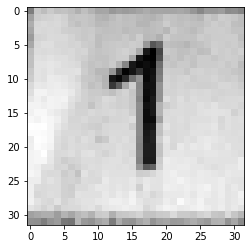

sample: 119 predicted: 0 actual: 0


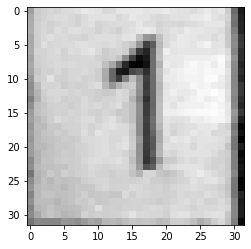

sample: 120 predicted: 8 actual: 8


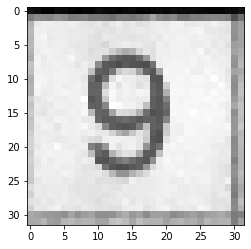

sample: 121 predicted: 1 actual: 1


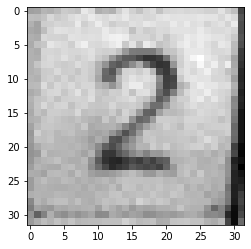

sample: 122 predicted: 0 actual: 0


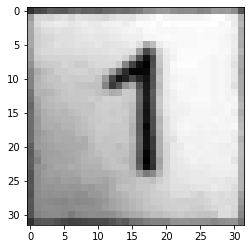

sample: 123 predicted: 1 actual: 1


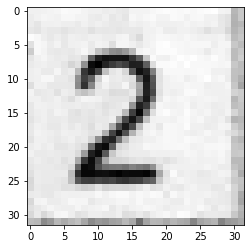

sample: 124 predicted: 2 actual: 2


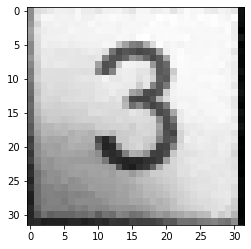

sample: 125 predicted: 7 actual: 7


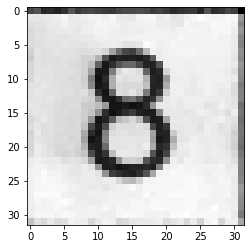

sample: 126 predicted: 7 actual: 5


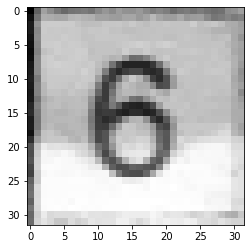

sample: 127 predicted: 4 actual: 4


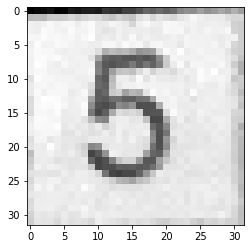

sample: 128 predicted: 4 actual: 4


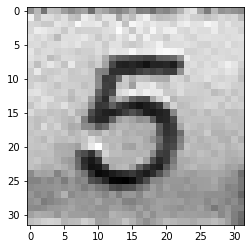

sample: 129 predicted: 0 actual: 0


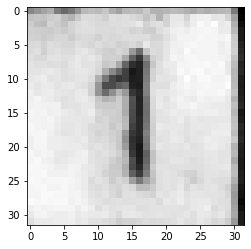

sample: 130 predicted: 3 actual: 3


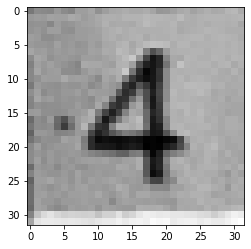

sample: 131 predicted: 8 actual: 8


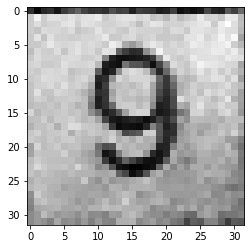

sample: 132 predicted: 4 actual: 4


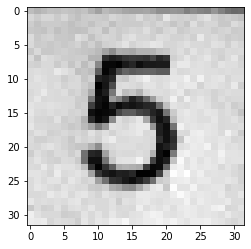

sample: 133 predicted: 1 actual: 1


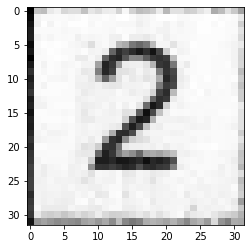

sample: 134 predicted: 2 actual: 2


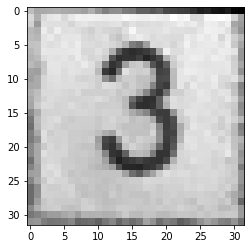

sample: 135 predicted: 7 actual: 7


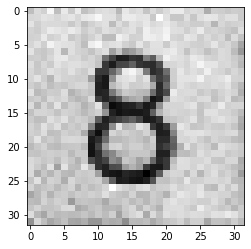

sample: 136 predicted: 0 actual: 0


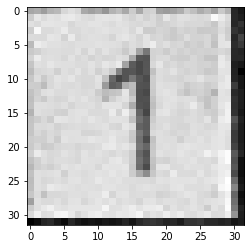

sample: 137 predicted: 4 actual: 4


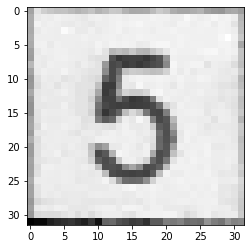

sample: 138 predicted: 8 actual: 8


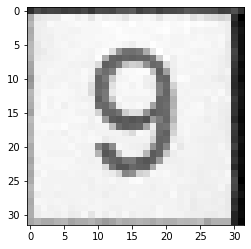

sample: 139 predicted: 7 actual: 7


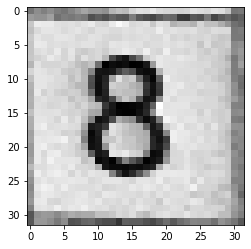

sample: 140 predicted: 8 actual: 8


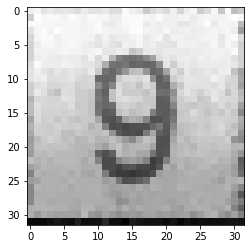

sample: 141 predicted: 8 actual: 8


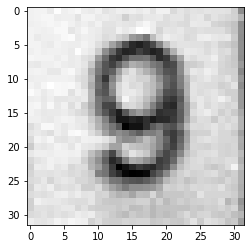

sample: 142 predicted: 7 actual: 7


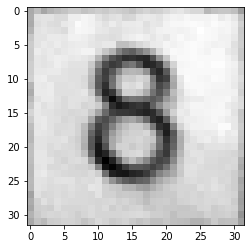

sample: 143 predicted: 0 actual: 0


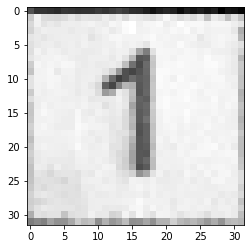

sample: 144 predicted: 3 actual: 3


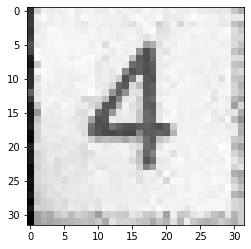

sample: 145 predicted: 6 actual: 6


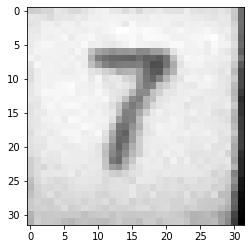

sample: 146 predicted: 6 actual: 6


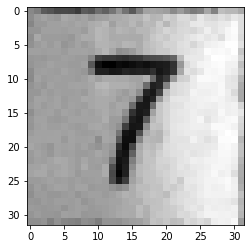

sample: 147 predicted: 8 actual: 8


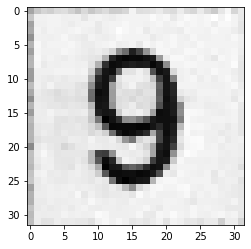

sample: 148 predicted: 1 actual: 1


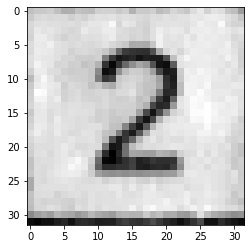

sample: 149 predicted: 3 actual: 3


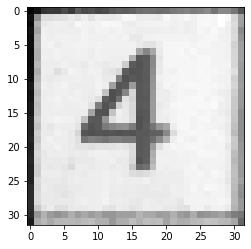

sample: 150 predicted: 2 actual: 2


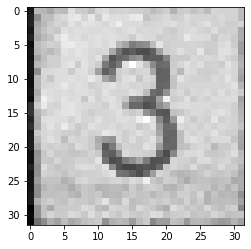

sample: 151 predicted: 4 actual: 4


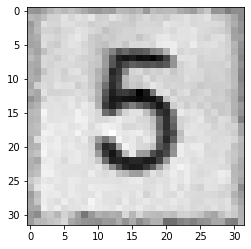

sample: 152 predicted: 2 actual: 2


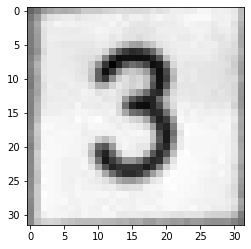

sample: 153 predicted: 5 actual: 5


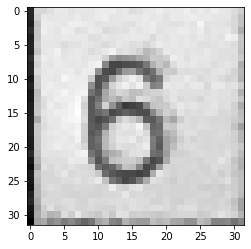

sample: 154 predicted: 3 actual: 3


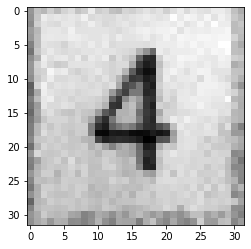

sample: 155 predicted: 0 actual: 0


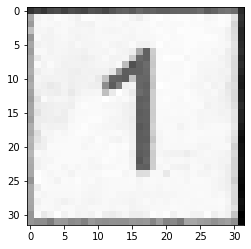

sample: 156 predicted: 6 actual: 6


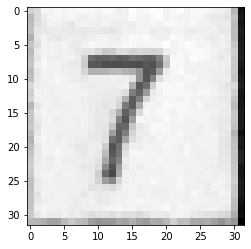

sample: 157 predicted: 1 actual: 1


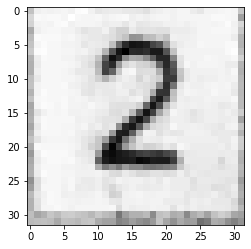

sample: 158 predicted: 7 actual: 7


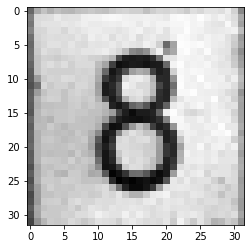

sample: 159 predicted: 6 actual: 6


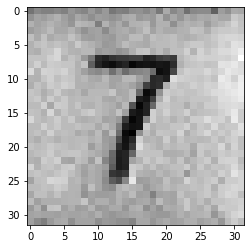

sample: 160 predicted: 6 actual: 6


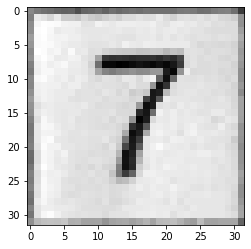

sample: 161 predicted: 6 actual: 6


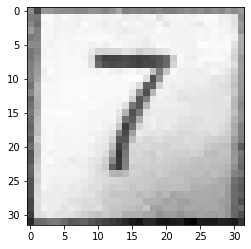

sample: 162 predicted: 4 actual: 4


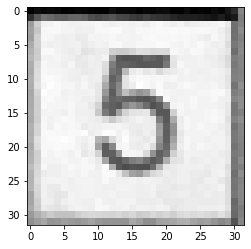

sample: 163 predicted: 4 actual: 4


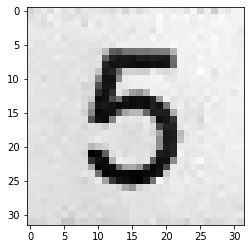

sample: 164 predicted: 8 actual: 8


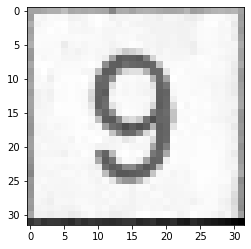

sample: 165 predicted: 8 actual: 8


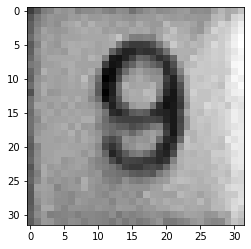

sample: 166 predicted: 5 actual: 5


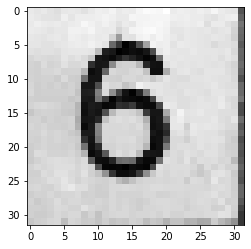

sample: 167 predicted: 2 actual: 2


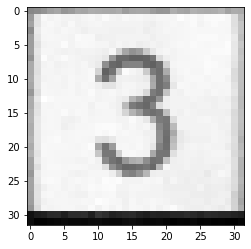

sample: 168 predicted: 5 actual: 5


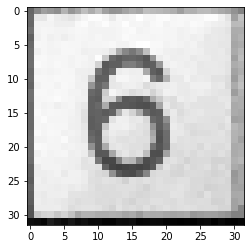

sample: 169 predicted: 8 actual: 8


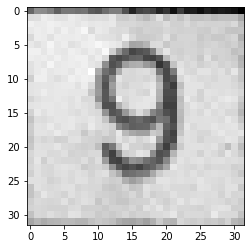

sample: 170 predicted: 4 actual: 4


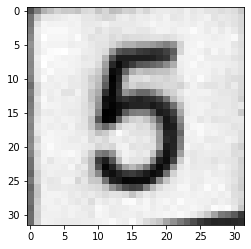

sample: 171 predicted: 1 actual: 1


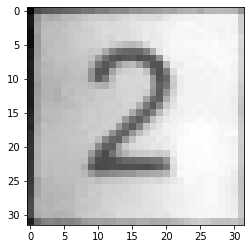

sample: 172 predicted: 4 actual: 4


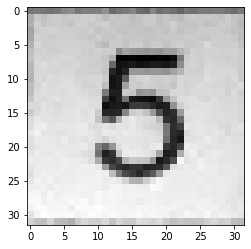

sample: 173 predicted: 2 actual: 2


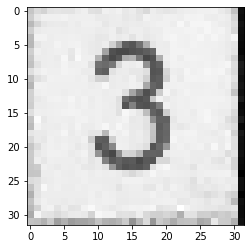

sample: 174 predicted: 5 actual: 5


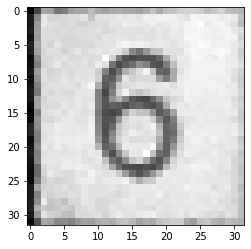

sample: 175 predicted: 8 actual: 8


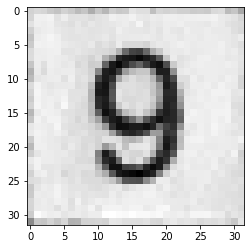

sample: 176 predicted: 3 actual: 3


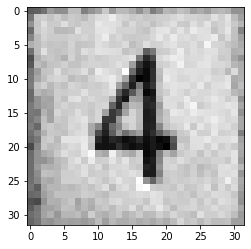

sample: 177 predicted: 1 actual: 1


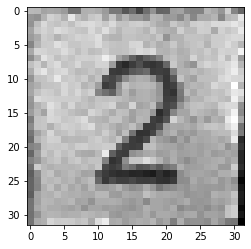

sample: 178 predicted: 4 actual: 4


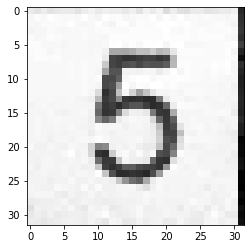

sample: 179 predicted: 0 actual: 0


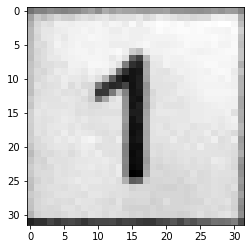

sample: 180 predicted: 3 actual: 3


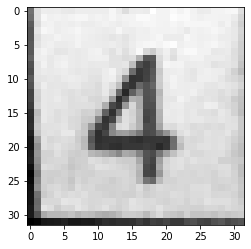

sample: 181 predicted: 5 actual: 5


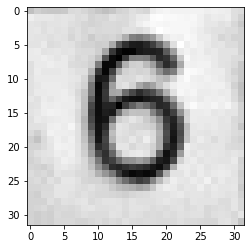

sample: 182 predicted: 3 actual: 3


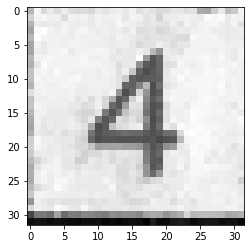

sample: 183 predicted: 5 actual: 5


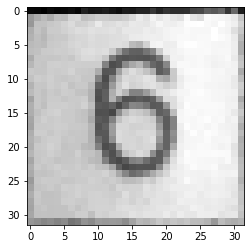

sample: 184 predicted: 1 actual: 1


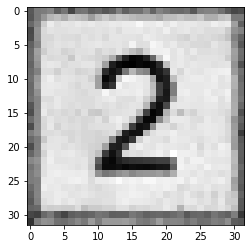

sample: 185 predicted: 8 actual: 8


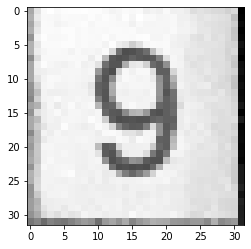

sample: 186 predicted: 1 actual: 1


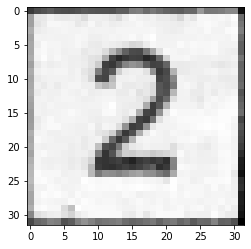

sample: 187 predicted: 3 actual: 3


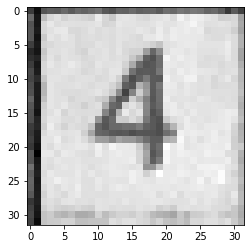

sample: 188 predicted: 1 actual: 1


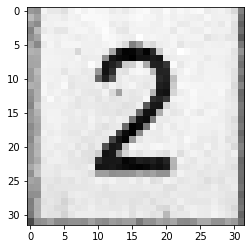

sample: 189 predicted: 8 actual: 8


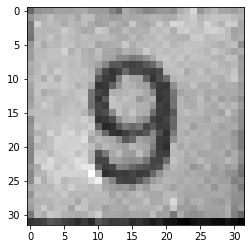

sample: 190 predicted: 1 actual: 1


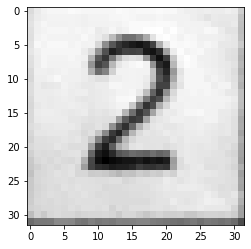

sample: 191 predicted: 7 actual: 7


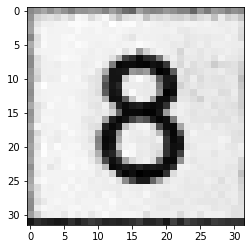

sample: 192 predicted: 1 actual: 1


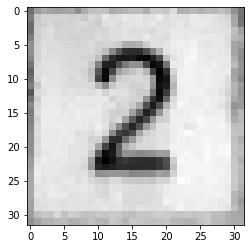

sample: 193 predicted: 6 actual: 6


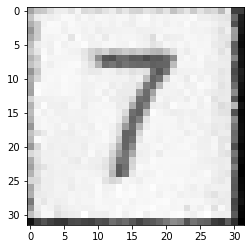

sample: 194 predicted: 6 actual: 6


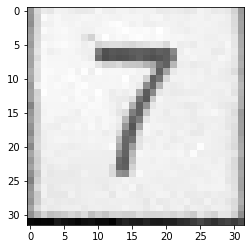

sample: 195 predicted: 6 actual: 6


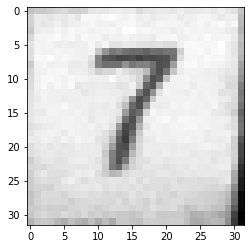

sample: 196 predicted: 4 actual: 4


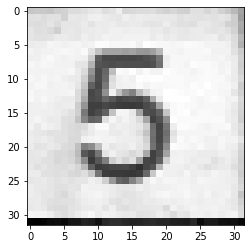

sample: 197 predicted: 0 actual: 0


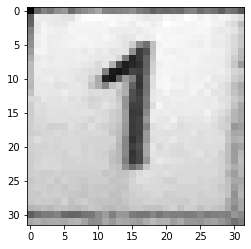

sample: 198 predicted: 8 actual: 8


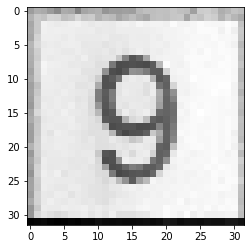

sample: 199 predicted: 6 actual: 6


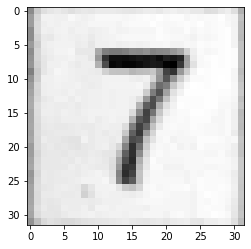

sample: 200 predicted: 6 actual: 6


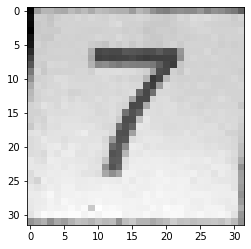

sample: 201 predicted: 0 actual: 0


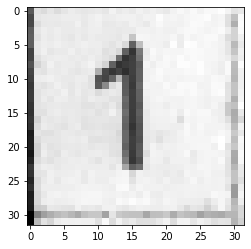

sample: 202 predicted: 8 actual: 8


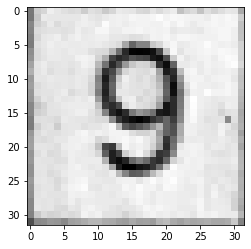

sample: 203 predicted: 6 actual: 6


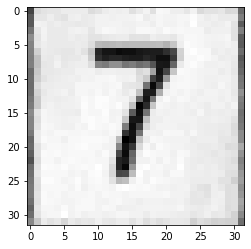

sample: 204 predicted: 4 actual: 4


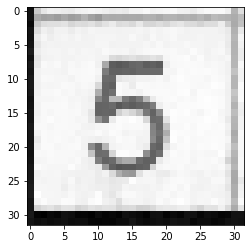

sample: 205 predicted: 4 actual: 4


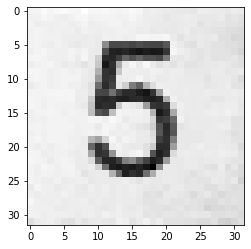

sample: 206 predicted: 1 actual: 1


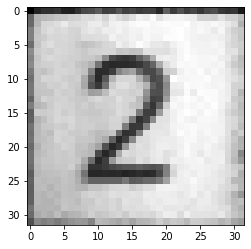

sample: 207 predicted: 3 actual: 3


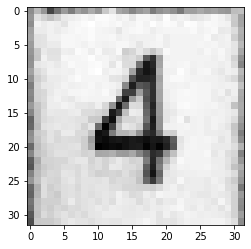

sample: 208 predicted: 8 actual: 8


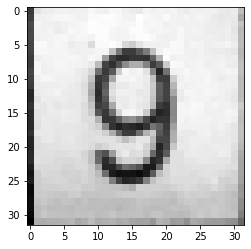

sample: 209 predicted: 0 actual: 0


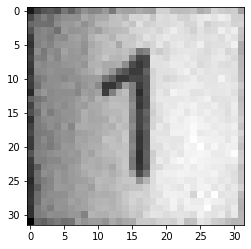

sample: 210 predicted: 6 actual: 6


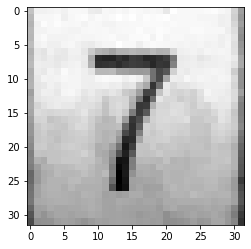

sample: 211 predicted: 5 actual: 5


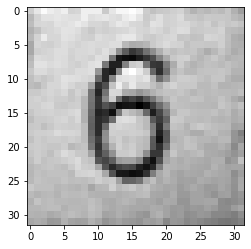

sample: 212 predicted: 8 actual: 8


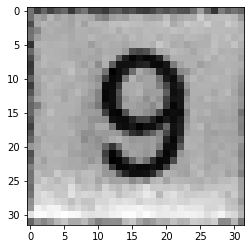

sample: 213 predicted: 4 actual: 4


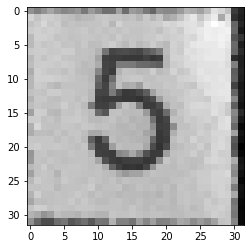

sample: 214 predicted: 3 actual: 3


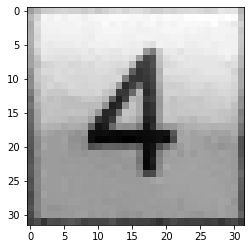

sample: 215 predicted: 3 actual: 3


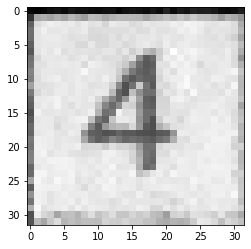

sample: 216 predicted: 1 actual: 1


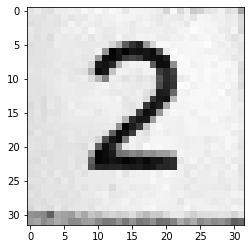

sample: 217 predicted: 1 actual: 1


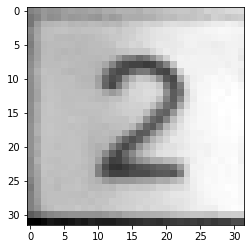

sample: 218 predicted: 1 actual: 1


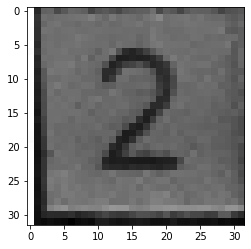

sample: 219 predicted: 7 actual: 7


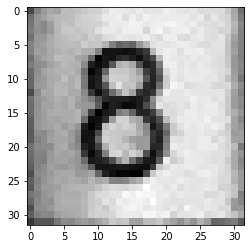

sample: 220 predicted: 0 actual: 0


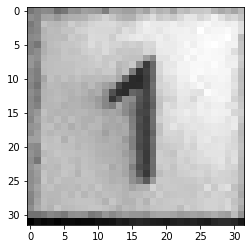

sample: 221 predicted: 8 actual: 8


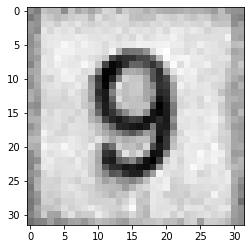

sample: 222 predicted: 5 actual: 5


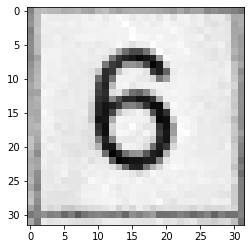

sample: 223 predicted: 2 actual: 2


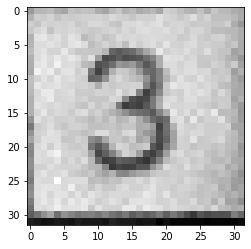

sample: 224 predicted: 2 actual: 2


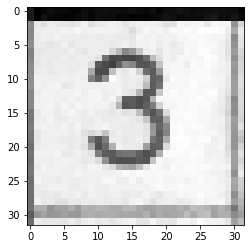

sample: 225 predicted: 6 actual: 6


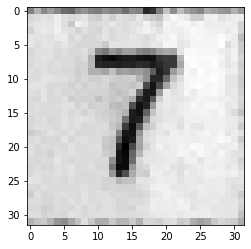

sample: 226 predicted: 7 actual: 7


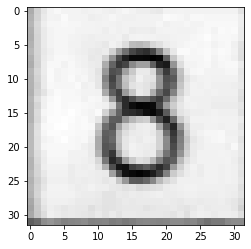

sample: 227 predicted: 5 actual: 5


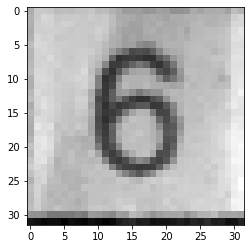

sample: 228 predicted: 3 actual: 3


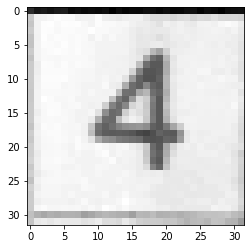

sample: 229 predicted: 2 actual: 1


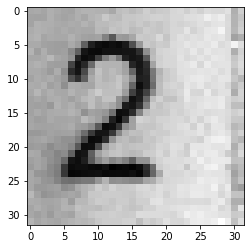

sample: 230 predicted: 0 actual: 0


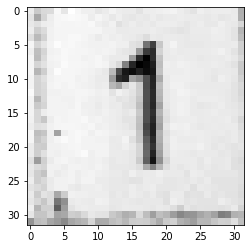

sample: 231 predicted: 8 actual: 8


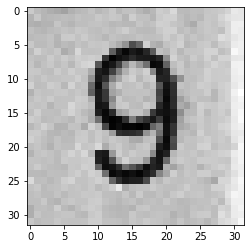

sample: 232 predicted: 7 actual: 7


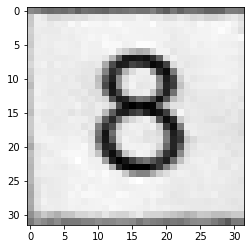

sample: 233 predicted: 8 actual: 8


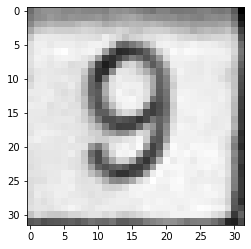

sample: 234 predicted: 7 actual: 7


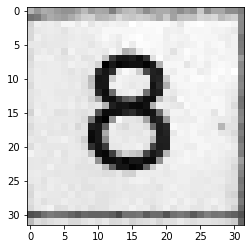

sample: 235 predicted: 8 actual: 8


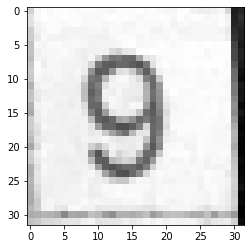

sample: 236 predicted: 4 actual: 4


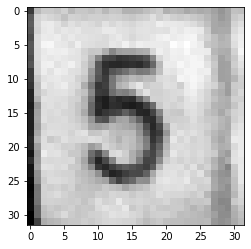

sample: 237 predicted: 4 actual: 4


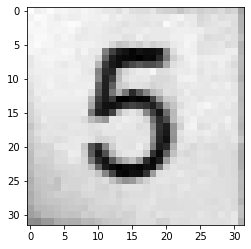

sample: 238 predicted: 4 actual: 4


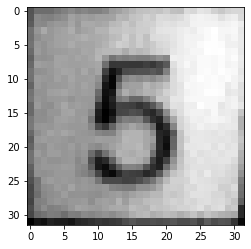

sample: 239 predicted: 2 actual: 2


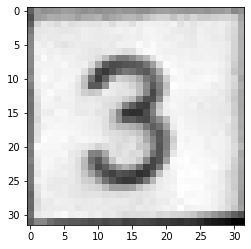

sample: 240 predicted: 6 actual: 6


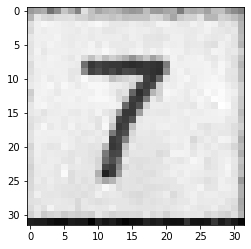

sample: 241 predicted: 8 actual: 8


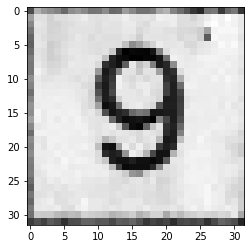

sample: 242 predicted: 4 actual: 4


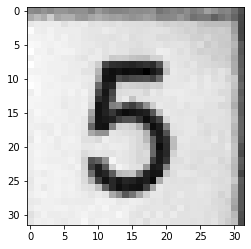

sample: 243 predicted: 2 actual: 2


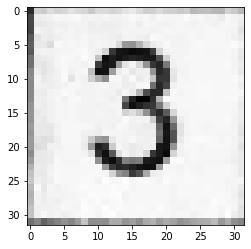

sample: 244 predicted: 6 actual: 6


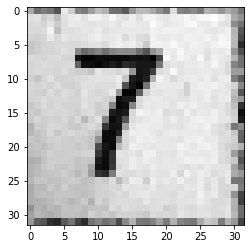

sample: 245 predicted: 2 actual: 2


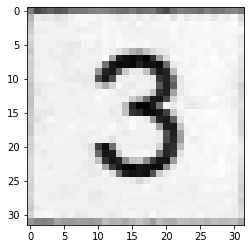

sample: 246 predicted: 8 actual: 8


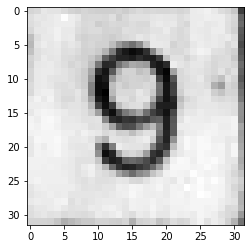

sample: 247 predicted: 0 actual: 0


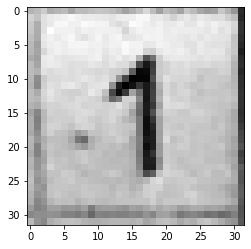

sample: 248 predicted: 4 actual: 4


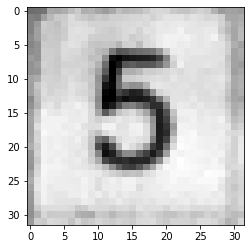

sample: 249 predicted: 5 actual: 5


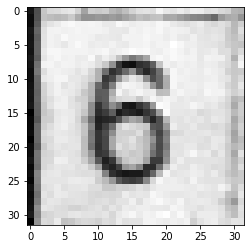

sample: 250 predicted: 3 actual: 3


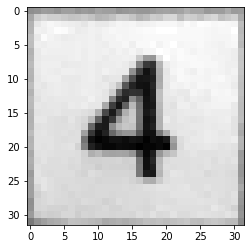

sample: 251 predicted: 8 actual: 8


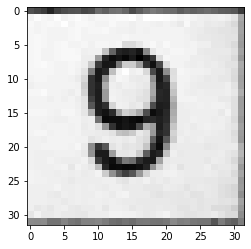

sample: 252 predicted: 4 actual: 4


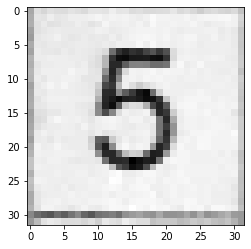

sample: 253 predicted: 6 actual: 6


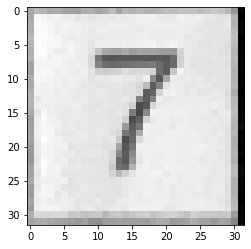

sample: 254 predicted: 2 actual: 2


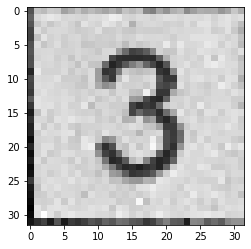

sample: 255 predicted: 7 actual: 7


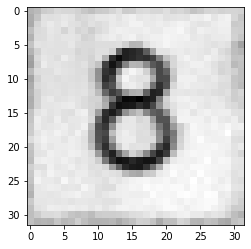

sample: 256 predicted: 0 actual: 0


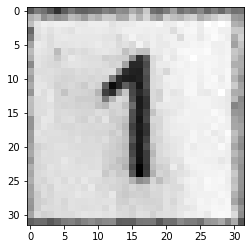

sample: 257 predicted: 3 actual: 3


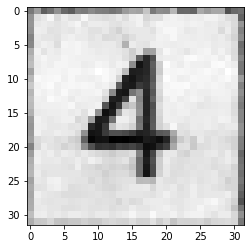

sample: 258 predicted: 4 actual: 4


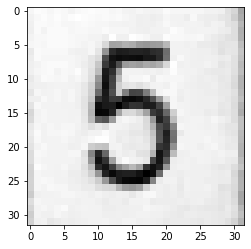

sample: 259 predicted: 1 actual: 1


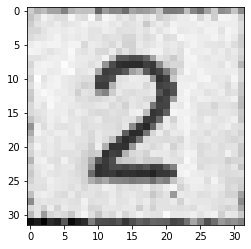

sample: 260 predicted: 7 actual: 7


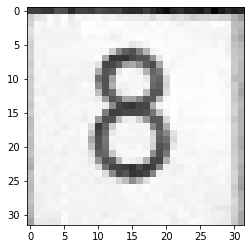

sample: 261 predicted: 6 actual: 6


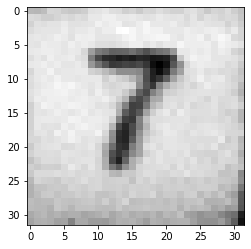

sample: 262 predicted: 7 actual: 5


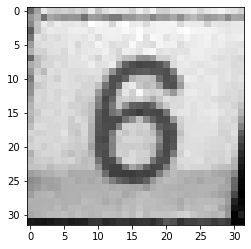

sample: 263 predicted: 7 actual: 7


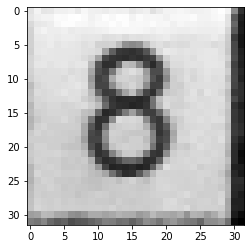

sample: 264 predicted: 7 actual: 7


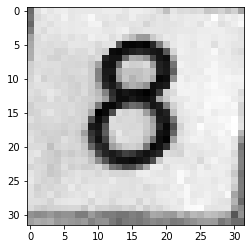

sample: 265 predicted: 3 actual: 3


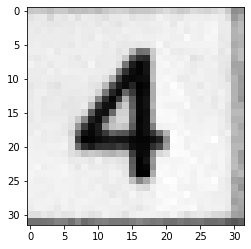

sample: 266 predicted: 7 actual: 7


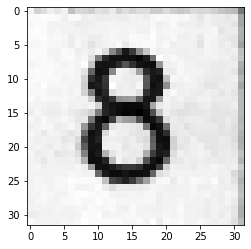

sample: 267 predicted: 4 actual: 4


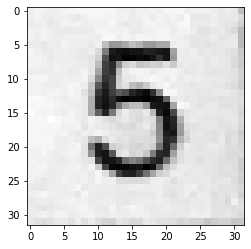

sample: 268 predicted: 4 actual: 4


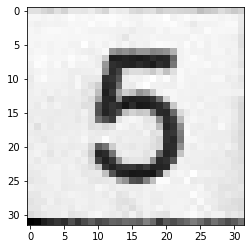

sample: 269 predicted: 2 actual: 2


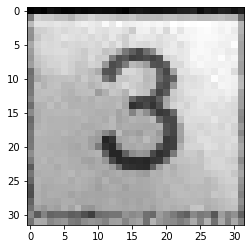

sample: 270 predicted: 4 actual: 4


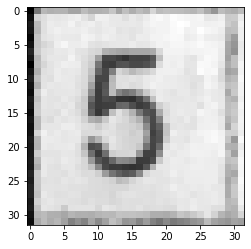

sample: 271 predicted: 3 actual: 3


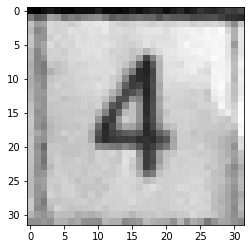

sample: 272 predicted: 4 actual: 4


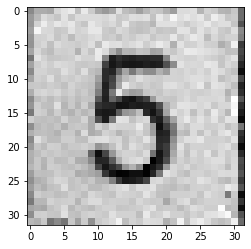

sample: 273 predicted: 3 actual: 3


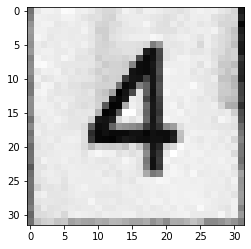

sample: 274 predicted: 2 actual: 2


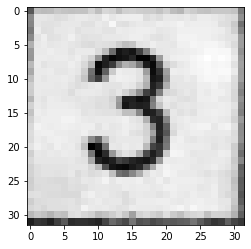

sample: 275 predicted: 2 actual: 2


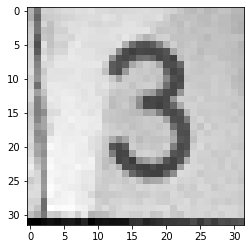

sample: 276 predicted: 8 actual: 8


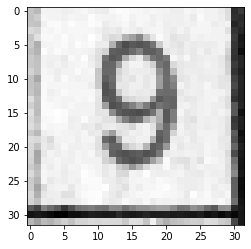

sample: 277 predicted: 0 actual: 0


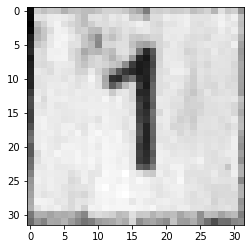

sample: 278 predicted: 6 actual: 6


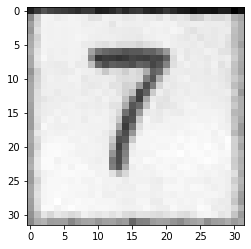

sample: 279 predicted: 4 actual: 4


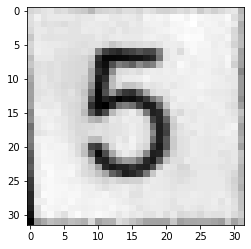

sample: 280 predicted: 2 actual: 2


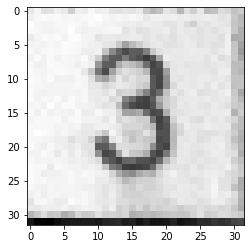

sample: 281 predicted: 5 actual: 5


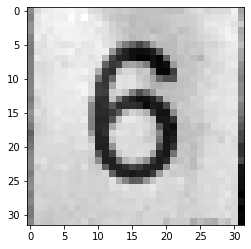

sample: 282 predicted: 7 actual: 7


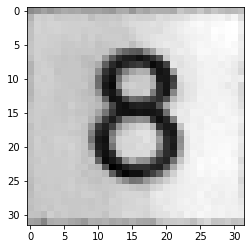

sample: 283 predicted: 8 actual: 8


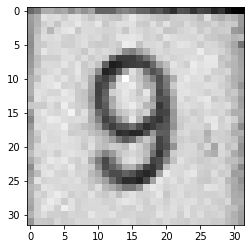

sample: 284 predicted: 5 actual: 5


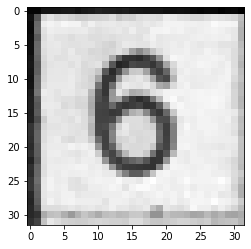

sample: 285 predicted: 7 actual: 7


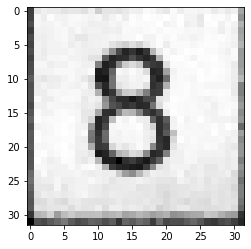

sample: 286 predicted: 1 actual: 1


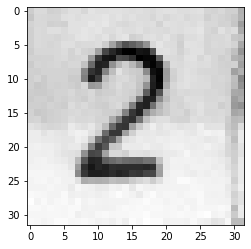

sample: 287 predicted: 1 actual: 1


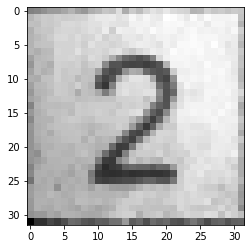

sample: 288 predicted: 0 actual: 0


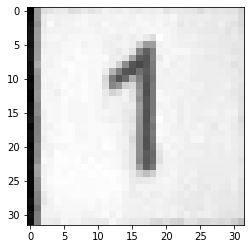

sample: 289 predicted: 8 actual: 8


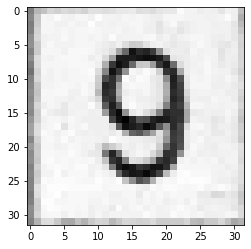

sample: 290 predicted: 8 actual: 8


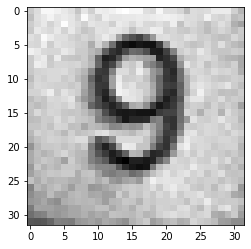

sample: 291 predicted: 3 actual: 3


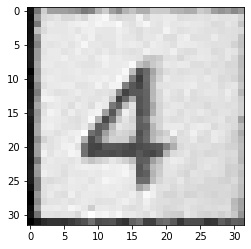

sample: 292 predicted: 4 actual: 4


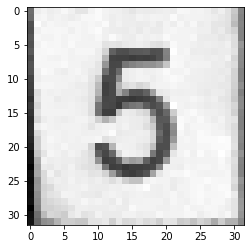

sample: 293 predicted: 7 actual: 7


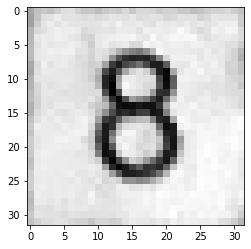

sample: 294 predicted: 2 actual: 2


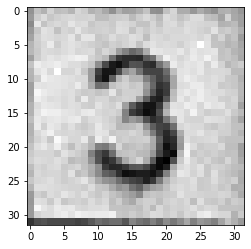

sample: 295 predicted: 6 actual: 6


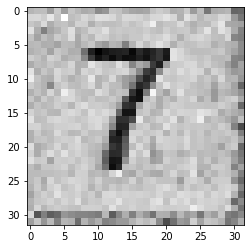

sample: 296 predicted: 1 actual: 1


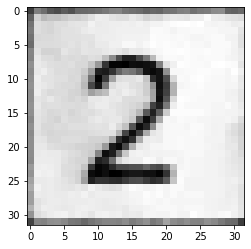

sample: 297 predicted: 3 actual: 3


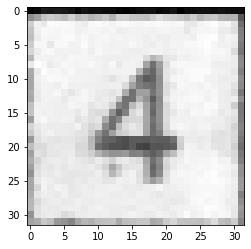

sample: 298 predicted: 5 actual: 5


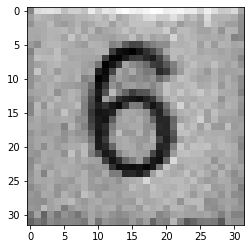

sample: 299 predicted: 7 actual: 7


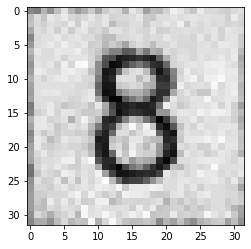

sample: 300 predicted: 6 actual: 6


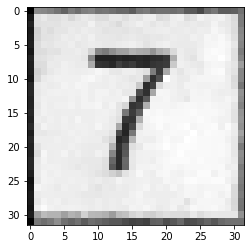

sample: 301 predicted: 8 actual: 8


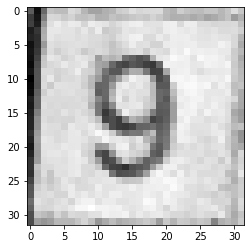

sample: 302 predicted: 5 actual: 5


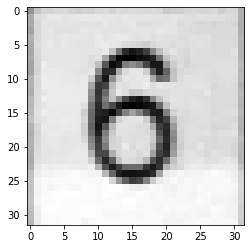

sample: 303 predicted: 7 actual: 7


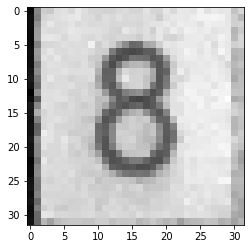

sample: 304 predicted: 8 actual: 8


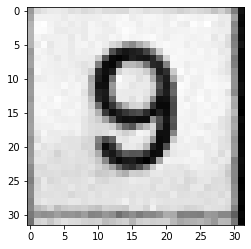

sample: 305 predicted: 2 actual: 2


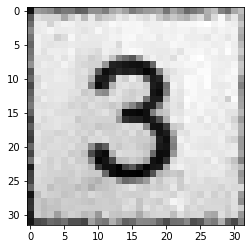

sample: 306 predicted: 2 actual: 2


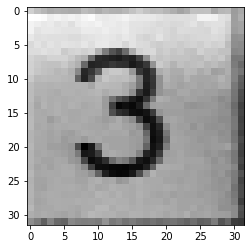

sample: 307 predicted: 6 actual: 6


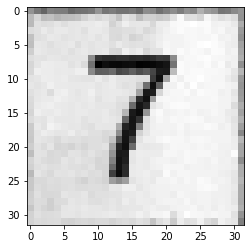

sample: 308 predicted: 0 actual: 0


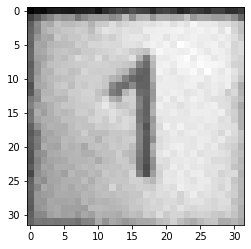

sample: 309 predicted: 7 actual: 7


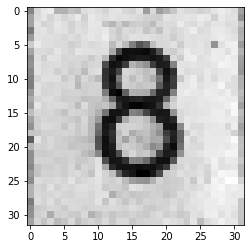

sample: 310 predicted: 1 actual: 1


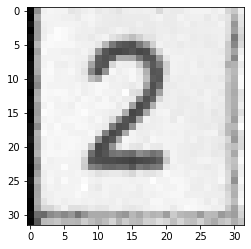

sample: 311 predicted: 2 actual: 2


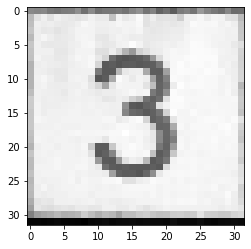

sample: 312 predicted: 5 actual: 5


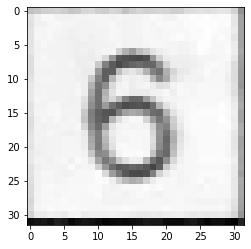

sample: 313 predicted: 7 actual: 7


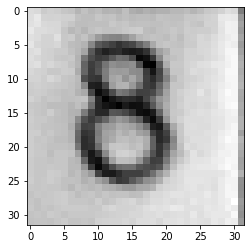

sample: 314 predicted: 5 actual: 5


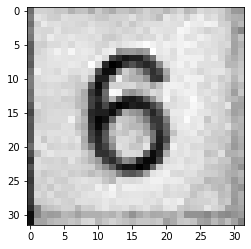

sample: 315 predicted: 1 actual: 1


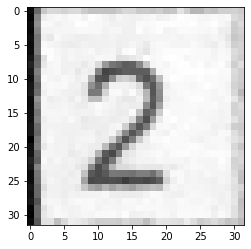

sample: 316 predicted: 2 actual: 2


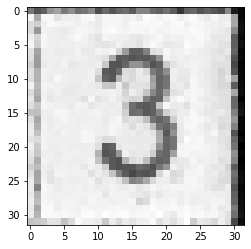

sample: 317 predicted: 3 actual: 3


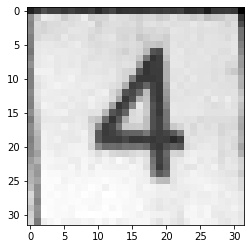

sample: 318 predicted: 8 actual: 8


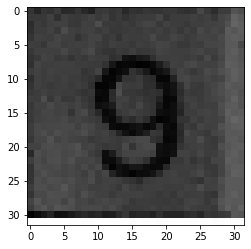

sample: 319 predicted: 0 actual: 0


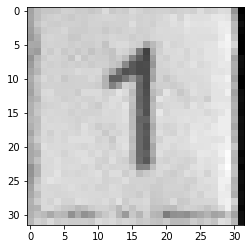

sample: 320 predicted: 0 actual: 0


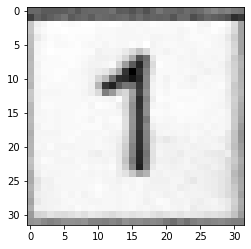

sample: 321 predicted: 5 actual: 5


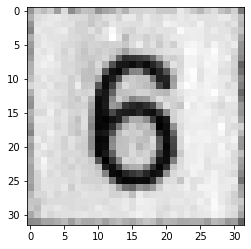

sample: 322 predicted: 5 actual: 5


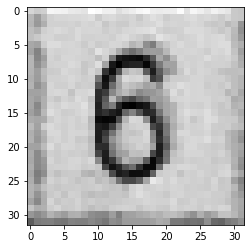

sample: 323 predicted: 4 actual: 4


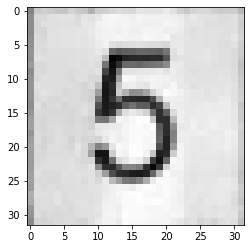

sample: 324 predicted: 5 actual: 5


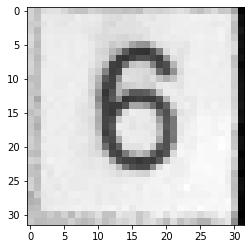

sample: 325 predicted: 3 actual: 3


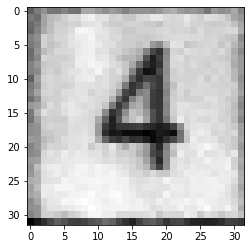

sample: 326 predicted: 8 actual: 8


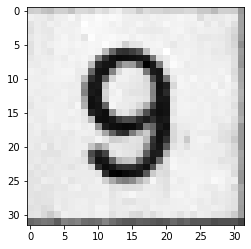

sample: 327 predicted: 3 actual: 3


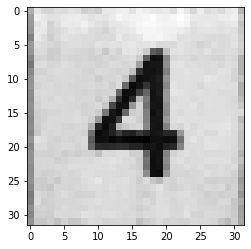

sample: 328 predicted: 6 actual: 6


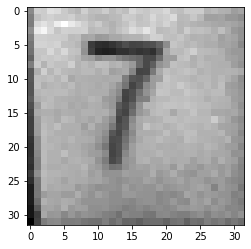

sample: 329 predicted: 7 actual: 7


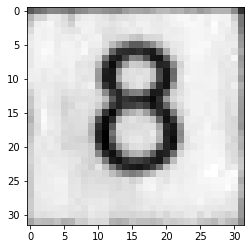

sample: 330 predicted: 2 actual: 2


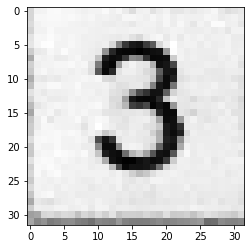

sample: 331 predicted: 1 actual: 1


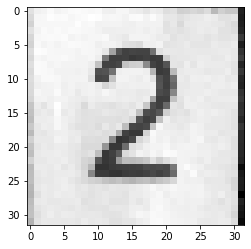

sample: 332 predicted: 6 actual: 6


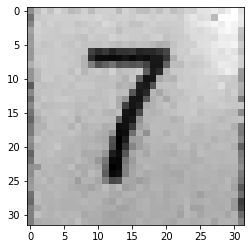

sample: 333 predicted: 1 actual: 1


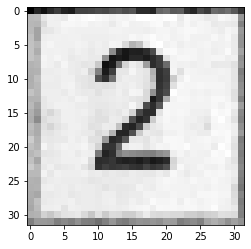

sample: 334 predicted: 1 actual: 1


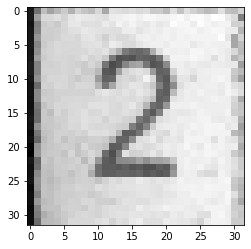

sample: 335 predicted: 1 actual: 1


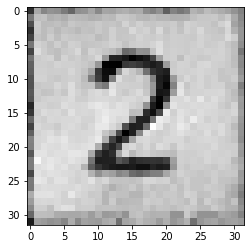

sample: 336 predicted: 4 actual: 4


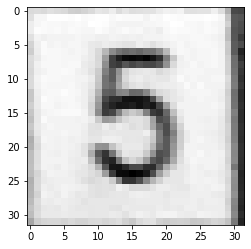

sample: 337 predicted: 3 actual: 3


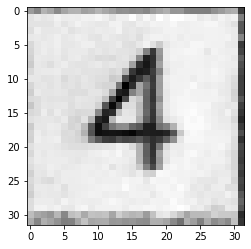

sample: 338 predicted: 8 actual: 8


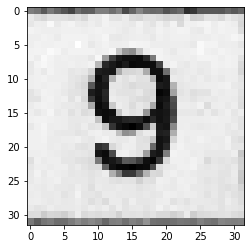

sample: 339 predicted: 5 actual: 5


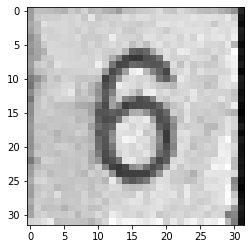

sample: 340 predicted: 0 actual: 0


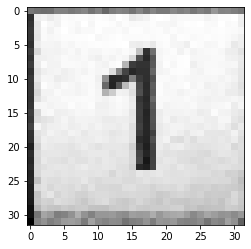

sample: 341 predicted: 0 actual: 0


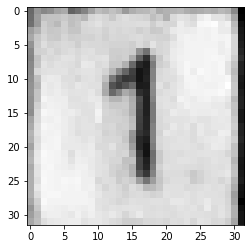

sample: 342 predicted: 2 actual: 2


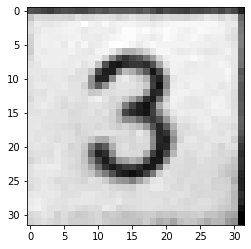

sample: 343 predicted: 0 actual: 0


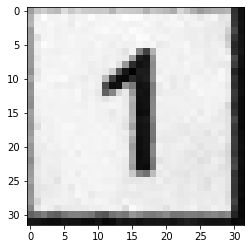

sample: 344 predicted: 7 actual: 7


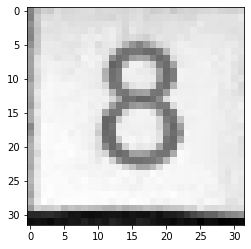

sample: 345 predicted: 1 actual: 1


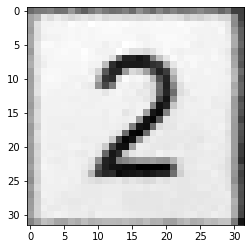

sample: 346 predicted: 2 actual: 2


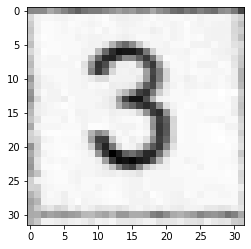

sample: 347 predicted: 7 actual: 7


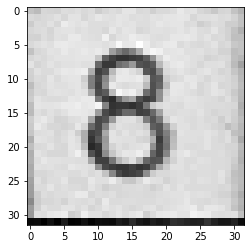

sample: 348 predicted: 7 actual: 7


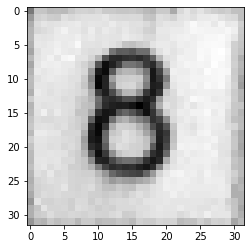

sample: 349 predicted: 4 actual: 4


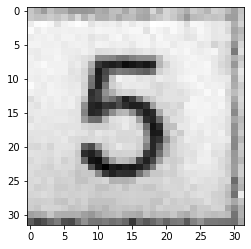

sample: 350 predicted: 6 actual: 6


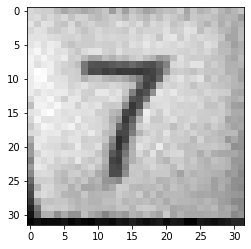

In [30]:
for i in range (len(X_test)):
    print("sample:",i,"predicted:",np.argmax(predictions[i]),"actual:",Y_test[i]) # Print out the number

    plt.imshow(X_test[i], cmap="gray") # Import the image
    plt.show() # Show the image

In [31]:
Y_test.shape

(351,)

AxesSubplot(0.125,0.125;0.62x0.755)


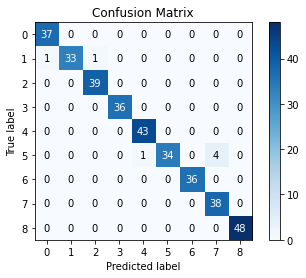

In [32]:
predictions = np.argmax(predictions,axis=1)
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt
print(skplt.plot_confusion_matrix(Y_test,predictions))